In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df = pd.read_csv('../datasets/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.364911,0.015683,0.015365,0.007395,0.013885,0.012632
std,0.181507,0.046049,0.053481,0.025431,0.050191,0.046959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468354,0.005444,0.003958,0.001916,0.003972,0.002942
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [70]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [72]:
print(f'Duplicates in train set: {df.duplicated().sum()}')

Duplicates in train set: 15


In [73]:
print("null values:")
print(df.isnull().sum())

null values:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [74]:
#handling missing values

diss_att = [0,1,2,3,5,11]
cont_att =[4,6,7,8,9,10]
for col in df.columns[:11]:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


print(df.isna().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


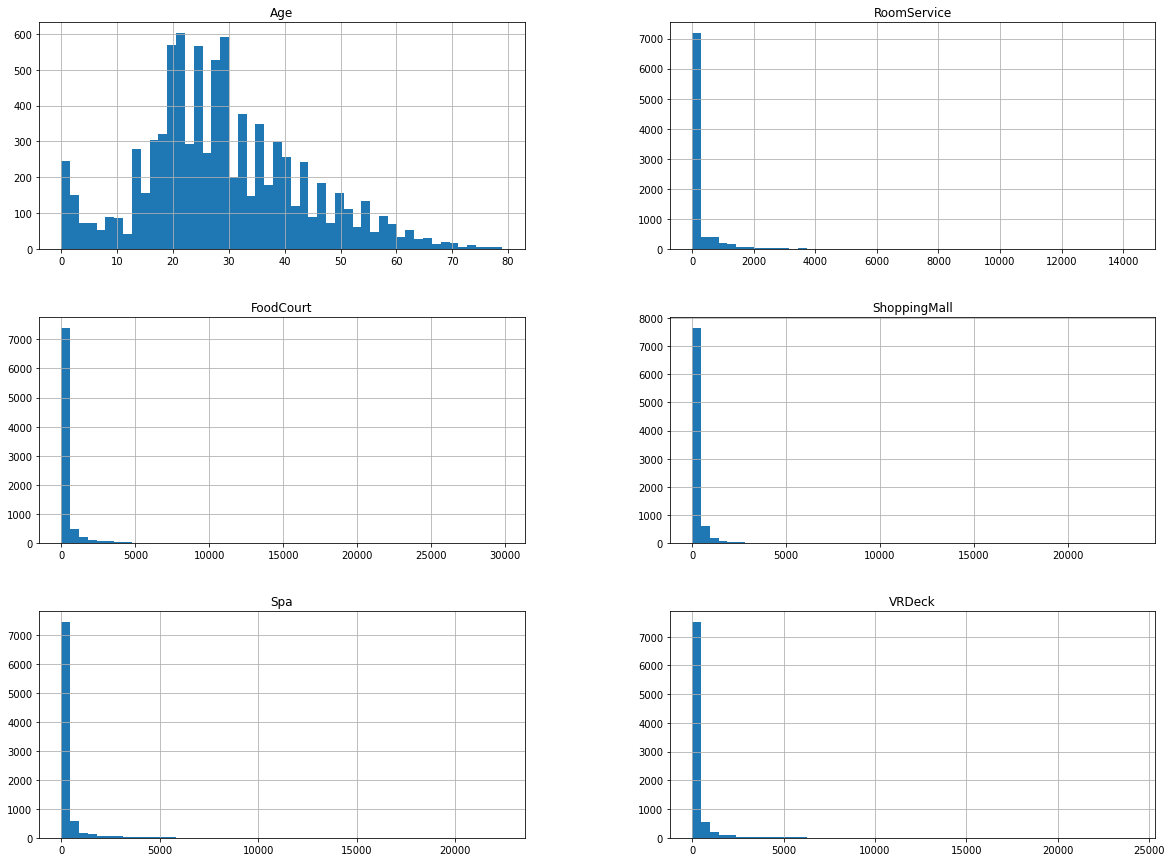

In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

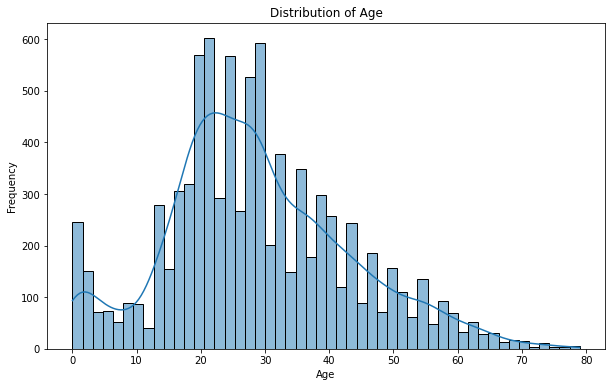

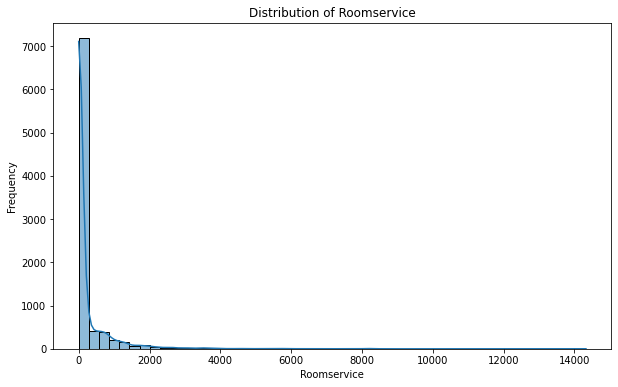

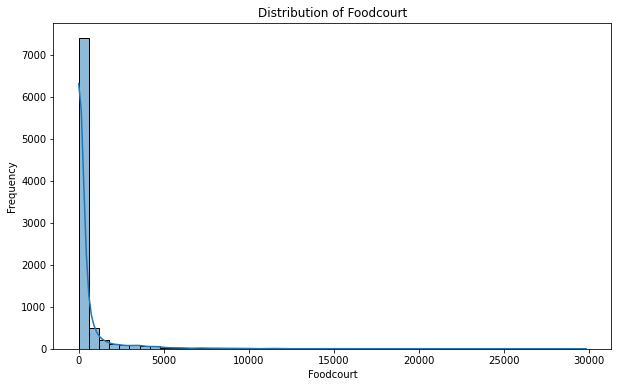

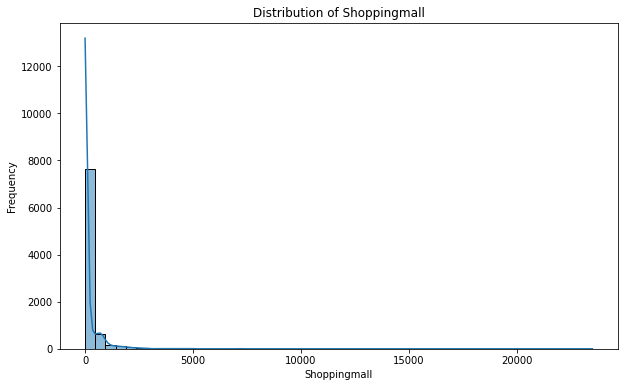

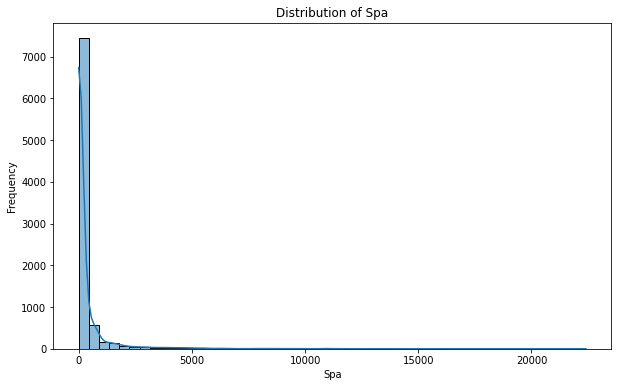

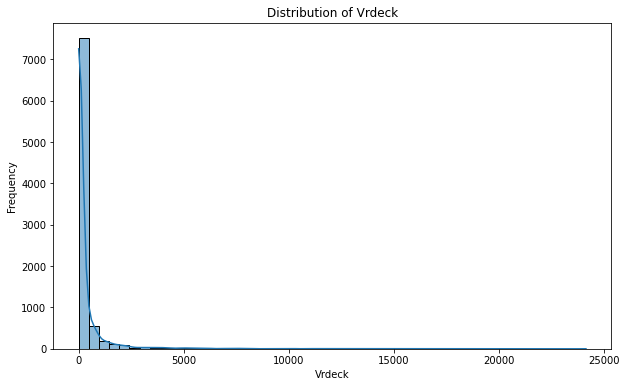

In [22]:
#a distributiom for comt columns


for i in cont_att:
    col = df.columns[i]
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title('Distribution of '+ col.title())
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.show()

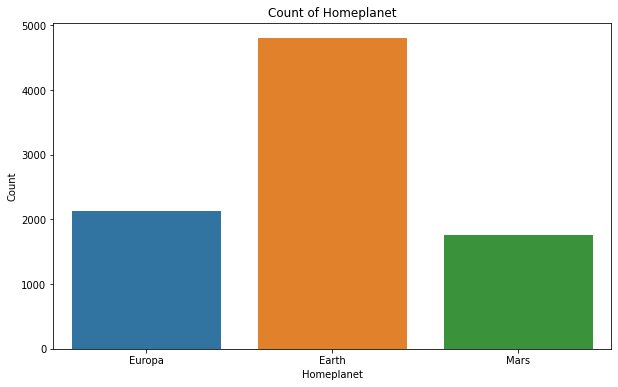

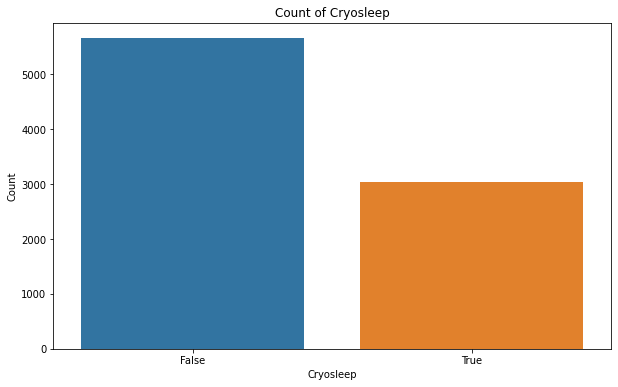

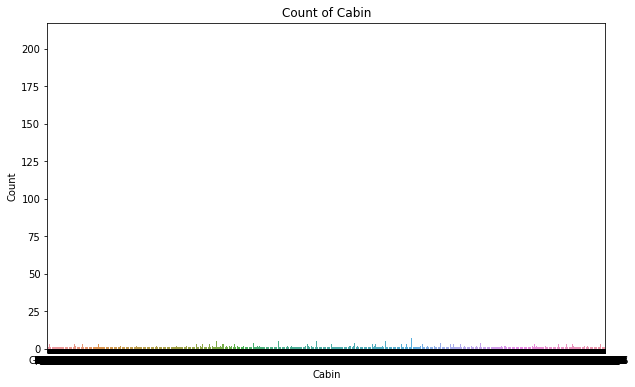

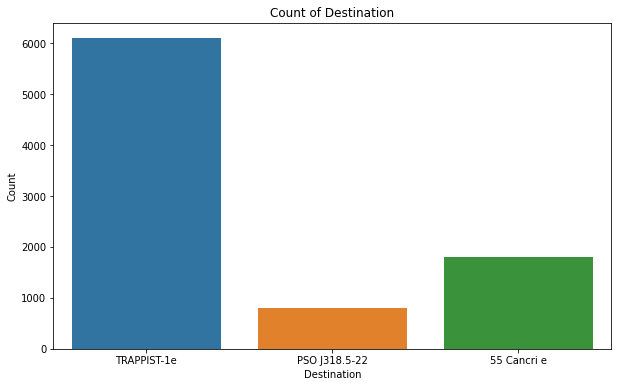

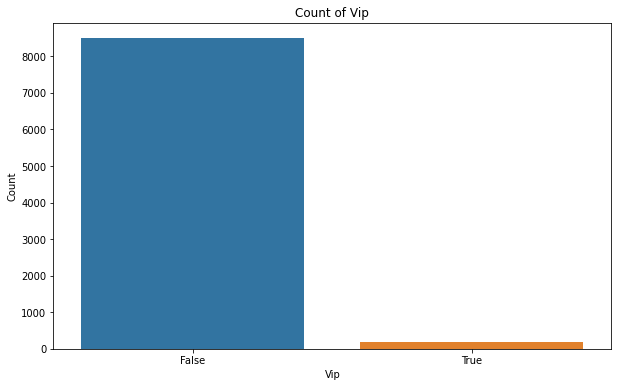

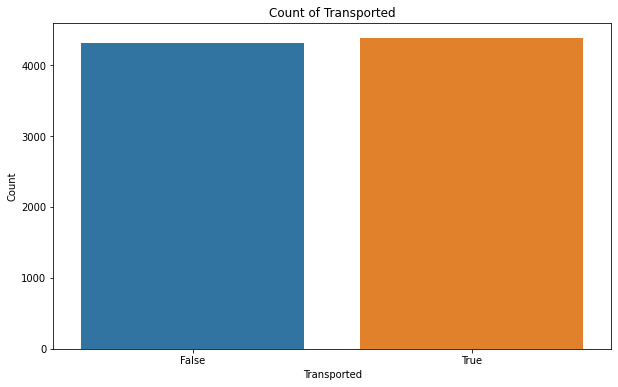

In [23]:
for index in diss_att:
    col = df.columns[index]
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col.title()}')   
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.show()

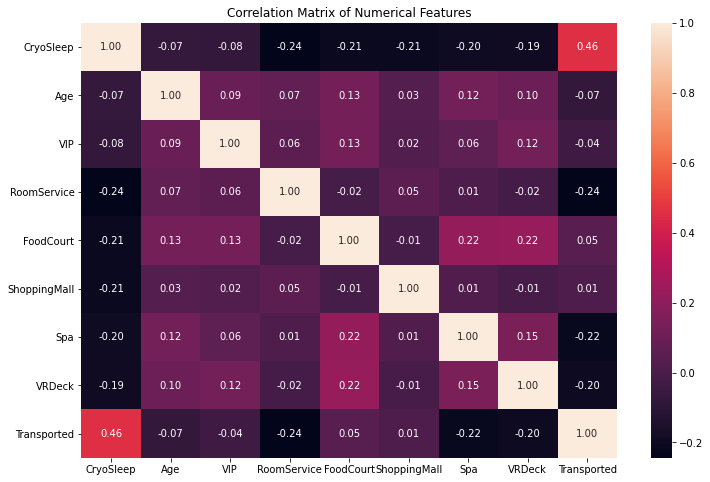

In [24]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='HomePlanet', ylabel='count'>

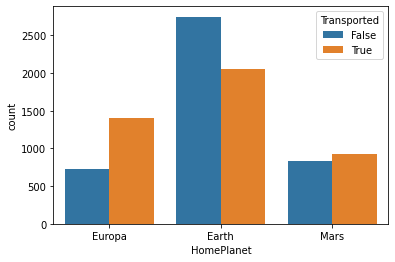

In [25]:
#realtationship between homeplanet and transported
sns.countplot(df.HomePlanet, hue=df.Transported)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='CryoSleep', ylabel='count'>

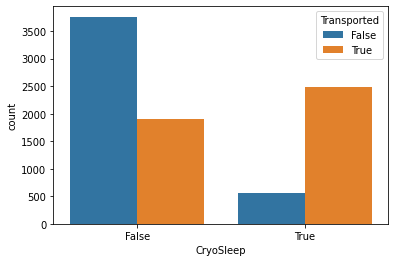

In [26]:
sns.countplot(df.CryoSleep, hue=df.Transported)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Destination', ylabel='count'>

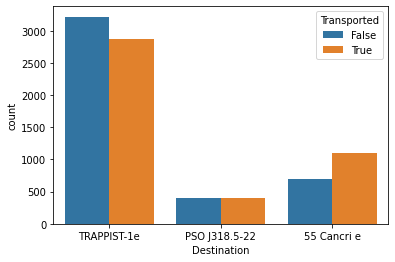

In [10]:
sns.countplot(df.Destination, hue=df.Transported)

<Axes: xlabel='Transported', ylabel='Age'>

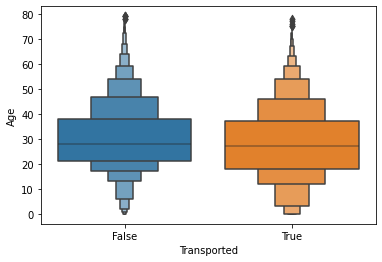

In [27]:
sns.boxenplot(y=df.Age, x=df.Transported)

In [ ]:
#not gonna use
'''
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df["Age"] < Q1 - 1.5*IQR) | (df["Age"] > Q3 + 1.5*IQR)]
print("IQR outliers:\n", outliers_iqr) '''

IQR outliers:
      HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
109       Earth      False    F/23/P    TRAPPIST-1e  64.0  False     0.000000   
118        Mars       True    F/27/S    TRAPPIST-1e  67.0  False     0.000000   
248       Earth      False    F/59/P    TRAPPIST-1e  63.0  False     0.000000   
280      Europa      False   G/734/S    TRAPPIST-1e  67.0  False   224.687617   
335      Europa      False    C/15/S    55 Cancri e  63.0  False     0.000000   
...         ...        ...       ...            ...   ...    ...          ...   
8254     Europa      False   B/340/S    TRAPPIST-1e  64.0  False     0.000000   
8288       Mars       True   D/278/P    TRAPPIST-1e  76.0  False     0.000000   
8369      Earth      False  G/1452/P  PSO J318.5-22  73.0  False  1806.000000   
8516     Europa      False    A/95/P    55 Cancri e  70.0  False     0.000000   
8539      Earth      False  G/1482/P    TRAPPIST-1e  64.0  False    37.000000   

      FoodCo

In [ ]:
#handling outliers in age
'''
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df["Age_scaled"] = scaler.fit_transform(df[["Age"]])

#replacing Age_scales in the df 
df['Age'] = df['Age_scaled']
df.drop('Age_scaled', axis=1, inplace=True)
df.head()
'''


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.705882,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,-0.176471,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,1.823529,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.352941,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,-0.647059,False,303.0,70.0,151.0,565.0,2.0,True


In [75]:
#splitting cabin column
df['Deck'] = df['Cabin'].apply(lambda x: str(x).split('/')[0] if pd.notnull(x) else 'Unknown')
df['Num'] = df['Cabin'].apply(lambda x: str(x).split('/')[1] if pd.notnull(x) else 'Unknown')
df['Side'] = df['Cabin'].apply(lambda x: str(x).split('/')[2] if pd.notnull(x) else 'Unknown')
df.drop('Cabin', axis=1, inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Deck', ylabel='count'>

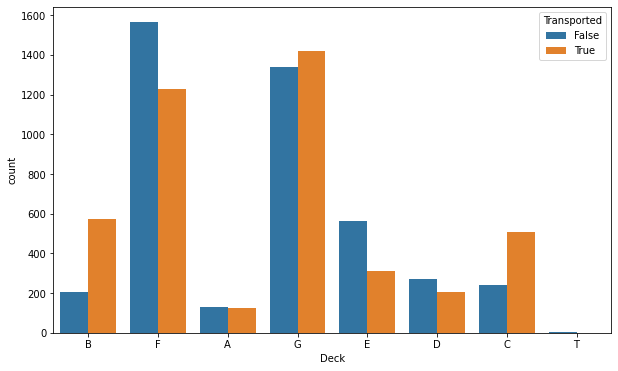

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(df.Deck, hue=df.Transported)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Side', ylabel='count'>

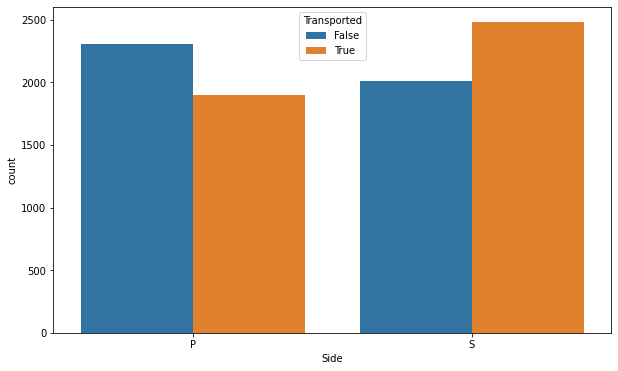

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df.Side, hue=df.Transported)
#p is for port and s is for starboard

In [76]:
#feaature engineering
#creating new column ( total spent)
df['total_spent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
#dropping the individual columns
df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

In [77]:
#creating an age group

df['Age_Group'] = 0
for i in range(6):
    df.loc[(df.Age >= 10*i) & (df.Age < 10*(i + 1)), 'Age_Group'] = i
    

#amother code
'''
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-19', '20-39', '40-59', '60-79', '80-99']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
'''


"\nbins = [0, 20, 40, 60, 80, 100]\nlabels = ['0-19', '20-39', '40-59', '60-79', '80-99']\ndf['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)\n"

<Axes: xlabel='count', ylabel='Age_Group'>

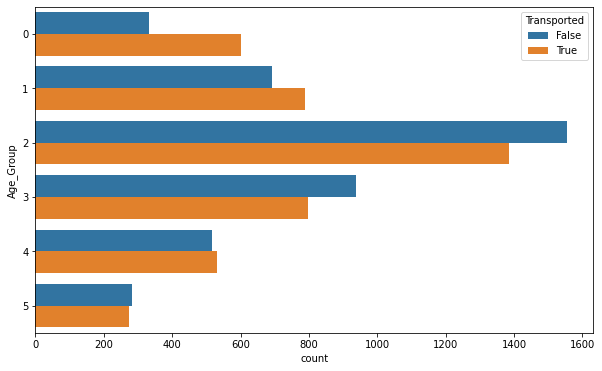

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Age_Group'], hue= df['Transported'])


In [80]:
from sklearn.model_selection import train_test_split

X_train = df.drop("Transported", axis=1)
y_train = df["Transported"]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(6954, 10)
(6954,)


In [ ]:
#label encoding
from cProfile import label
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
   


df.info()